In [46]:
import pandas as pd
import numpy as np
import matplotlib as plt
pd.options.display.max_rows = 15000
import seaborn as sns



In [38]:
#Pulling in the Data
source_data = pd.read_csv('/Users/jacobtryba/Documents/Portfolio/Bing-COVID-19-Data/data/Bing-COVID19-Data.csv') 

In [7]:
#Pulling USA to Examine on a State to Stave Level
USA_states = source_data.query('Country_Region == "United States"')

In [25]:
#Creating State data by grouping with State and then County
death_by_state = USA_states.groupby(['AdminRegion1','AdminRegion2']).agg({'DeathsChange' : 'sum'})
#Creating State data by grouping exclusively by State
death_by_state_false = USA_states.groupby(['AdminRegion1']).agg({'DeathsChange' : 'sum'})


In [28]:
#Realizing NaN's in AdminRegion1 and 2 were representative of rows SUMMING the data beneath it.
#Alaska is my check. Alaska has 17 deaths grouping by state, and only 7 when grouping by  AdminRegion2 (County).
#Thus, for the USA's case, grouping first by AdminRegion2 (County) and then grouping by AdminRegion1 (State).
#Spot check with current death counts by google confirm
death_by_state_false.head(2)

,DeathsChange
AdminRegion1,
Alabama,805.0
Alaska,17.0


In [29]:
#See above
death_by_state.query('AdminRegion1 == "Alaska"')

DeathsChange
AdminRegion1 AdminRegion2                                   
Alaska       Anchorage Borough                           4.0
             Bethel Census Area                          0.0
             Fairbanks North Star Borough                2.0
             Juneau Borough                              0.0
             Kenai Peninsula Borough                     0.0
             Ketchikan Gateway Borough                   0.0
             Kodiak Island Borough                       0.0
             Matanuska-Susitna Borough                   1.0
             Prince of Wales-Hyder Census Area           0.0
             Southeast Fairbanks Census Area             0.0
             Yukon-Koyukuk Census Area                   0.0
             Yukon–Koyukuk Census Area                   0.0

In [30]:
#See above. Creating the true death by state count by grouping first by state + county, then back to by state
death_by_state_true = death_by_state.groupby(['AdminRegion1']).agg({'DeathsChange' : 'sum'})

In [79]:
#Spot Check
death_by_state_true.head(100)
death_by_state_true = death_by_state_true.reset_index()
death_by_state_true = death_by_state_true.rename(columns={"AdminRegion1": "State", "DeathsChange": "Deaths"})

In [81]:
#Examining West Virginia's negative count.
#Kanawha county does in fact have 12 current deaths, so negatives are likely human errors.
#Jackson county currently has 16 deaths, so I'm confident this is the case.
death_by_state.query('AdminRegion1 == "West Virginia"')

DeathsChange
AdminRegion1  AdminRegion2                   
West Virginia Barbour County             -1.0
              Berkeley County            -5.0
              Boone County                0.0
              Braxton County              0.0
              Brooke County               0.0
              Cabell County               0.0
              Fayette County              0.0
              Grant County                0.0
              Greenbrier County           0.0
              Hampshire County            0.0
              Hancock County              0.0
              Hardy County                0.0
              Harrison County             0.0
              Jackson County            -13.0
              Jefferson County           -1.0
              Kanawha County            -12.0
              Lewis County                0.0
              Logan County                0.0
              Marion County               0.0
              Marshall County             0.0
              Mason County                0.0
              McDowell County             0.0
              Mercer County               0.0
              Mineral County              0.0
              Mingo County               -2.0
              Monongalia County          -5.0
              Monroe County               0.0
              Morgan County               0.0
              Nicholas County            -1.0
              Ohio County                 0.0
              Pendleton County            0.0
              Pleasants County            0.0
              Preston County              0.0
              Putnam County               0.0
              Raleigh County              0.0
              Randolph County             0.0
              Roane County                0.0
              Summers County              0.0
              Taylor County               0.0
              Tucker County               0.0
              Tyler County                0.0
              Upshur County               0.0
              Wayne County               -3.0
              Wetzel County               0.0
              Wirt County                 0.0
              Wood County                -2.0
              Wyoming County              0.0

In [93]:
#Creating a DF without New York and New Jersey
death_by_state_small = death_by_state_true.query('State != "New Jersey" & State != "New York"')
death_by_state_nynj = death_by_state_true.query('State == "New Jersey" | State == "New York"')

In [113]:
death_by_state_nynj.head(2)

,level_0,index,State,Deaths
30,30,30,New Jersey,9894.0
32,32,32,New York,26095.0


Text(0.5, 1.0, 'Deaths by State, Low to Mid Counts')

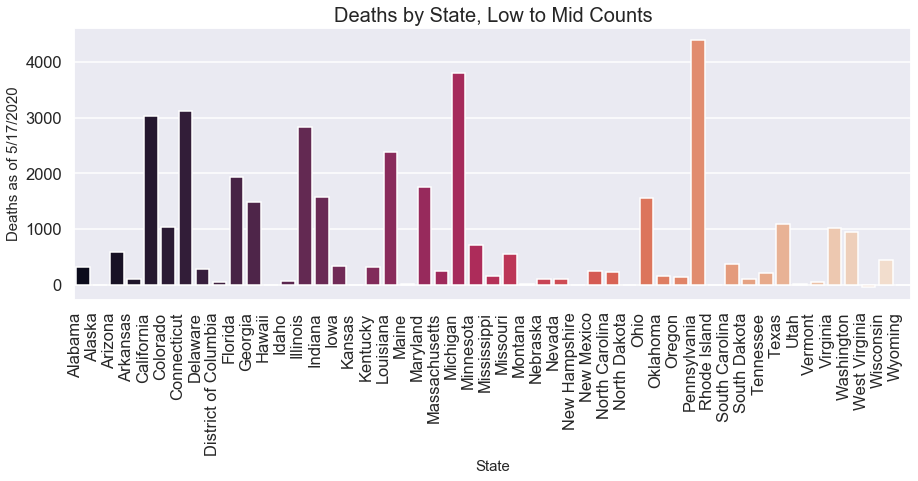

In [231]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", context="talk")

# Set up the matplotlib figure
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

x = death_by_state_small['State']
y1 = death_by_state_small['Deaths']
sns.barplot(x=x, y=y1, palette = "rocket", ax = ax1)
plt.xticks(rotation = 90, ha = 'right')

plt.ylabel('Deaths as of 5/17/2020', size = 15)
plt.xlabel('State', size = 15)

plt.title('Deaths by State, Low to Mid Counts', size = 20)

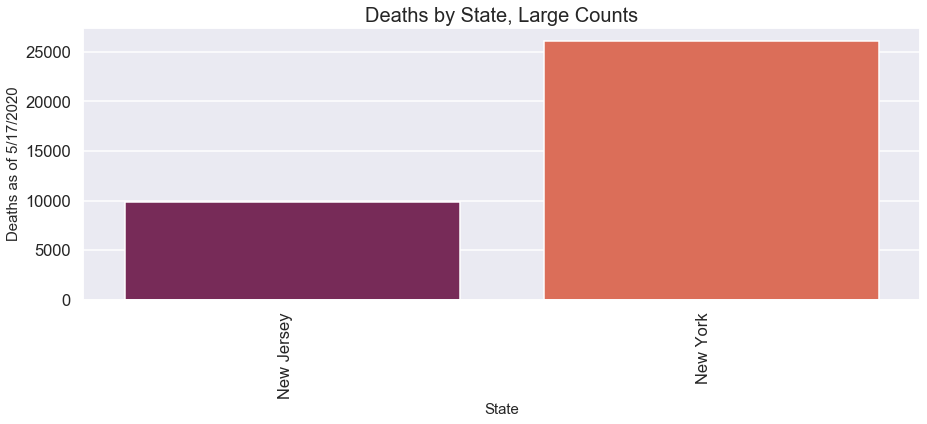

In [230]:
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

x2 = death_by_state_nynj['State']
y2 = death_by_state_nynj['Deaths']
sns.barplot(x=x2, y=y2, palette = "rocket", ax = ax1)
plt.xticks(rotation = 90, ha = 'right')
plt.ylabel('Deaths as of 5/17/2020', size = 15)
plt.xlabel('State', size = 15)
plt.title('Deaths by State, Large Counts', size = 20)
plt.show()



In [199]:
row_deaths_by_day = source_data.groupby(['Country_Region']).agg({'DeathsChange': 'sum'}).reset_index()

In [200]:
row_reduced = row_deaths_by_day.query('DeathsChange > 100 & DeathsChange < 10000')
row_reduced_big = row_deaths_by_day.query('DeathsChange > 9999 & Country_Region != "Worldwide"')

In [201]:
row_reduced.head(100)

,Country_Region,DeathsChange
0,Afghanistan,169.0
2,Algeria,548.0
8,Argentina,660.0
11,Australia,183.0
12,Austria,909.0
16,Bangladesh,328.0
18,Belarus,165.0
19,Belgium,9052.0
24,Bolivia,175.0
26,Bosnia and Herzegovina,129.0


In [202]:
row_reduced_big.head(100)

,Country_Region,DeathsChange
28,Brazil,31084.0
37,Canada,11356.0
71,France,28108.0
80,Germany,15722.0
105,Italy,53498.0
190,Spain,52057.0
217,United Kingdom,66897.0
218,United States,239029.0


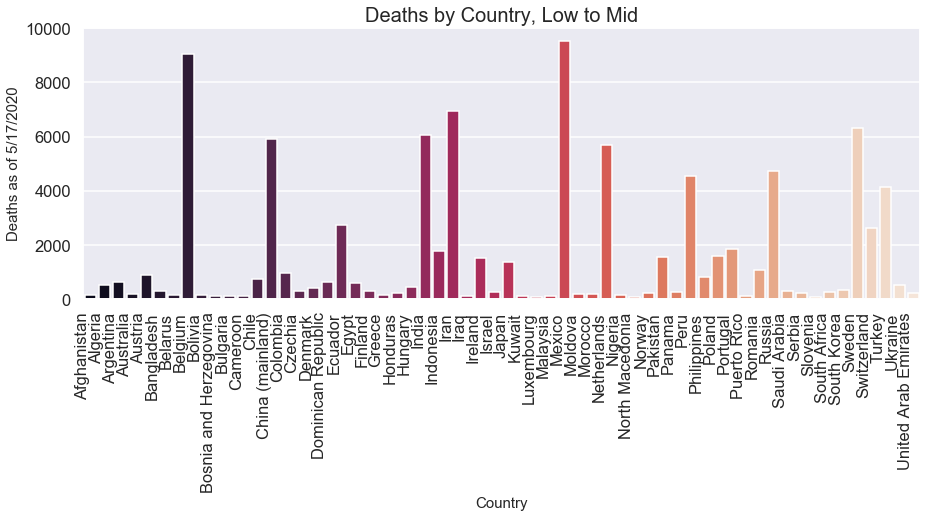

In [229]:
# Set up the matplotlib figure
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

x3 = row_reduced['Country_Region']
y3 = row_reduced['DeathsChange']
sns.barplot(x=x3, y=y3, palette = "rocket", ax = ax1)
plt.xticks(rotation = 90, ha = 'right')

plt.ylabel('Deaths as of 5/17/2020', size = 15)
plt.xlabel('Country', size = 15)
plt.title('Deaths by Country, Low to Mid', size = 20)
plt.show()


In [204]:
#Through spot checking, it's clear that many countries have data
#where a NaN value in county or state equivalent regions serving
#as a summation cell, meaning many deaths are duplicated. For the
#sake of plotting, cleanup has been sacrificed to the point that
#this visual CANNOT be used for anything. In a working environment,
#far more time is dedicated to removal of bad values.


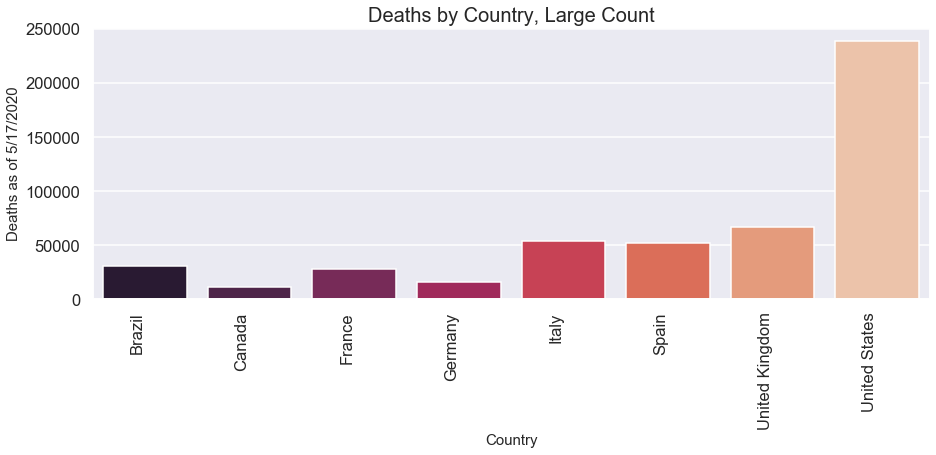

In [228]:
# Set up the matplotlib figure
f, (ax1) = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

x4 = row_reduced_big['Country_Region']
y4 = row_reduced_big['DeathsChange']
sns.barplot(x=x4, y=y4, palette = "rocket", ax = ax1)
plt.xticks(rotation = 90, ha = 'right')

plt.ylabel('Deaths as of 5/17/2020', size = 15)
plt.xlabel('Country', size = 15)
plt.title('Deaths by Country, Large Count', size = 20)

plt.show()

In [206]:
usa_deaths_by_day = USA_states.groupby(['Updated']).agg({'DeathsChange': 'sum'}).reset_index()

In [211]:
usa_deaths_by_day.Updated = usa_deaths_by_day.Updated.str.replace('/2020', '')

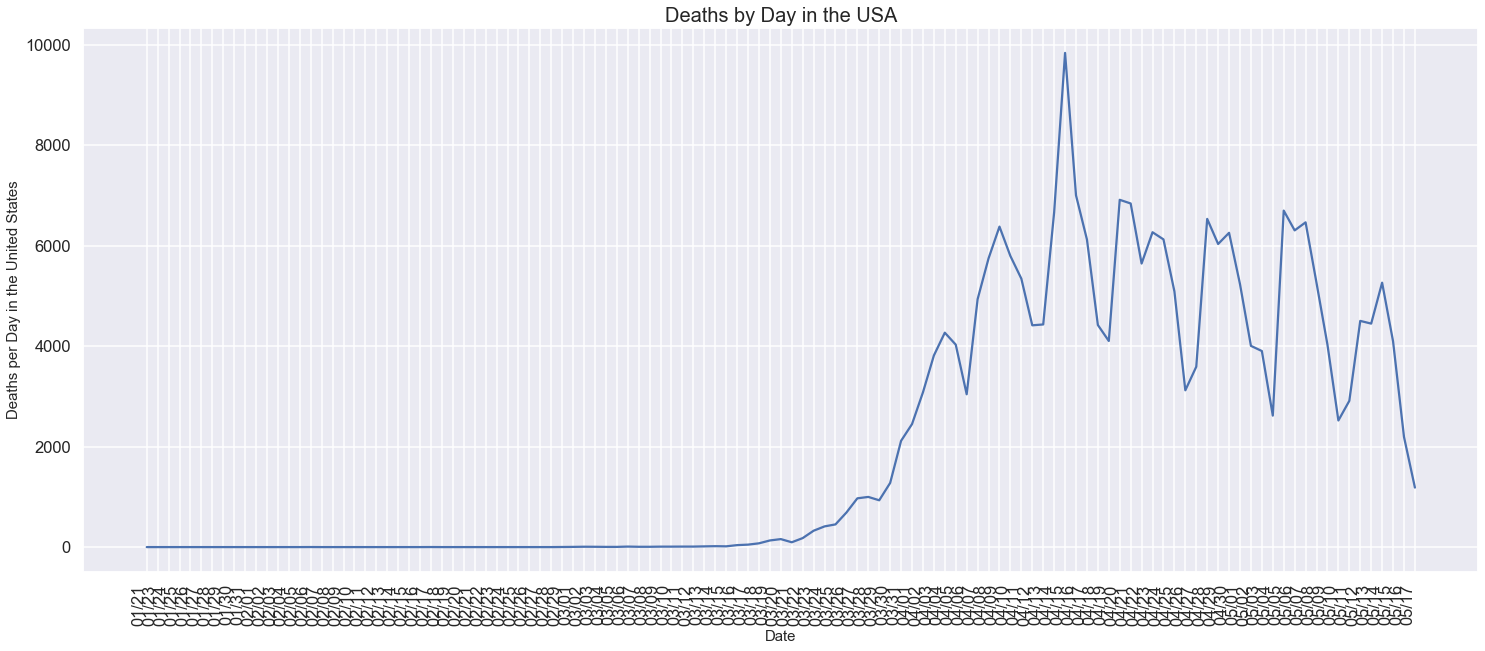

In [227]:

f, (ax1) = plt.subplots(1, 1, figsize=(25, 10), sharex=True)
# Plot the responses for different events and regions
sns.lineplot(x="Updated", y="DeathsChange", data=usa_deaths_by_day, ax= ax1)
plt.xticks(rotation = 90, ha = 'right')
plt.ylabel('Deaths per Day in the United States', size = 15)
plt.xlabel('Date', size = 15)
plt.title('Deaths by Day in the USA', size = 20)
plt.show()


,Updated,DeathsChange
0,01/21,0.0
1,01/23,0.0
2,01/24,0.0
3,01/25,0.0
4,01/26,0.0
5,01/27,0.0
6,01/28,0.0
7,01/29,0.0
8,01/30,0.0
9,01/31,0.0
